In [1870]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

In [1871]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [1872]:
# initial data
data_init = lambda name: pd.read_csv(f'data/{name}_data.csv')

df_train = data_init('train')
df_test = data_init('test')

df_train = reduce_mem_usage(df_train)
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.38 MB
Decreased by 60.9%
Memory usage of dataframe is 0.31 MB
Memory usage after optimization is: 0.13 MB
Decreased by 58.9%


In [1873]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.299999,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,100000000.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.300000,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.000000,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.500000,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.600000,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [1874]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                7500 non-null   category
 1   Annual Income                 5943 non-null   float32 
 2   Years in current job          7129 non-null   category
 3   Tax Liens                     7500 non-null   float32 
 4   Number of Open Accounts       7500 non-null   float32 
 5   Years of Credit History       7500 non-null   float32 
 6   Maximum Open Credit           7500 non-null   float32 
 7   Number of Credit Problems     7500 non-null   float32 
 8   Months since last delinquent  3419 non-null   float32 
 9   Bankruptcies                  7486 non-null   float32 
 10  Purpose                       7500 non-null   category
 11  Term                          7500 non-null   category
 12  Current Loan Amount           7500 non-null   fl

In [1875]:
# Check proportionality
df_train.shape[1] - df_test.shape[1] == 1

True

### Correlation

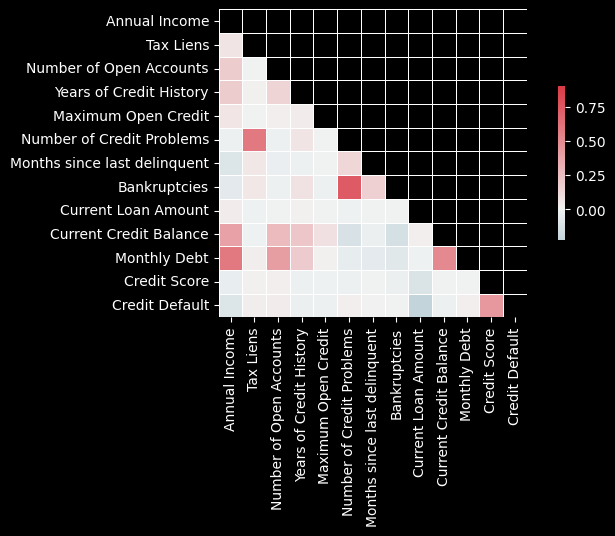

In [1876]:
corr = df_train.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig('./images/train_corrs.png', dpi=300)

In [1877]:
print(corr['Credit Default'].sort_values(ascending = False),'\n')

Credit Default                  1.000000
Credit Score                    0.442050
Number of Open Accounts         0.028884
Tax Liens                       0.024368
Number of Credit Problems       0.020088
Monthly Debt                    0.018480
Months since last delinquent    0.002598
Bankruptcies                    0.001648
Maximum Open Credit            -0.014275
Current Credit Balance         -0.019522
Years of Credit History        -0.020567
Annual Income                  -0.101375
Current Loan Amount            -0.226522
Name: Credit Default, dtype: float64 



In [1878]:
# Feature with more strong correlation
print(corr['Number of Credit Problems'].sort_values(ascending = False), '\n')

Number of Credit Problems       1.000000
Bankruptcies                    0.730751
Tax Liens                       0.595339
Months since last delinquent    0.139905
Years of Credit History         0.071259
Credit Default                  0.020088
Maximum Open Credit            -0.004750
Current Loan Amount            -0.008596
Annual Income                  -0.015407
Number of Open Accounts        -0.017813
Credit Score                   -0.018473
Monthly Debt                   -0.042252
Current Credit Balance         -0.124137
Name: Number of Credit Problems, dtype: float64 



### Nan

In [1879]:
# 5 columns with NaN: [
#   'Annual Income',
#   'Years in current job',
#   'Months since last delinquent',
#   'Bankruptcies',
#   'Credit Score'
# ]
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

### Emissions

In [1880]:
numeric_features = df_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default'],
      dtype='object')

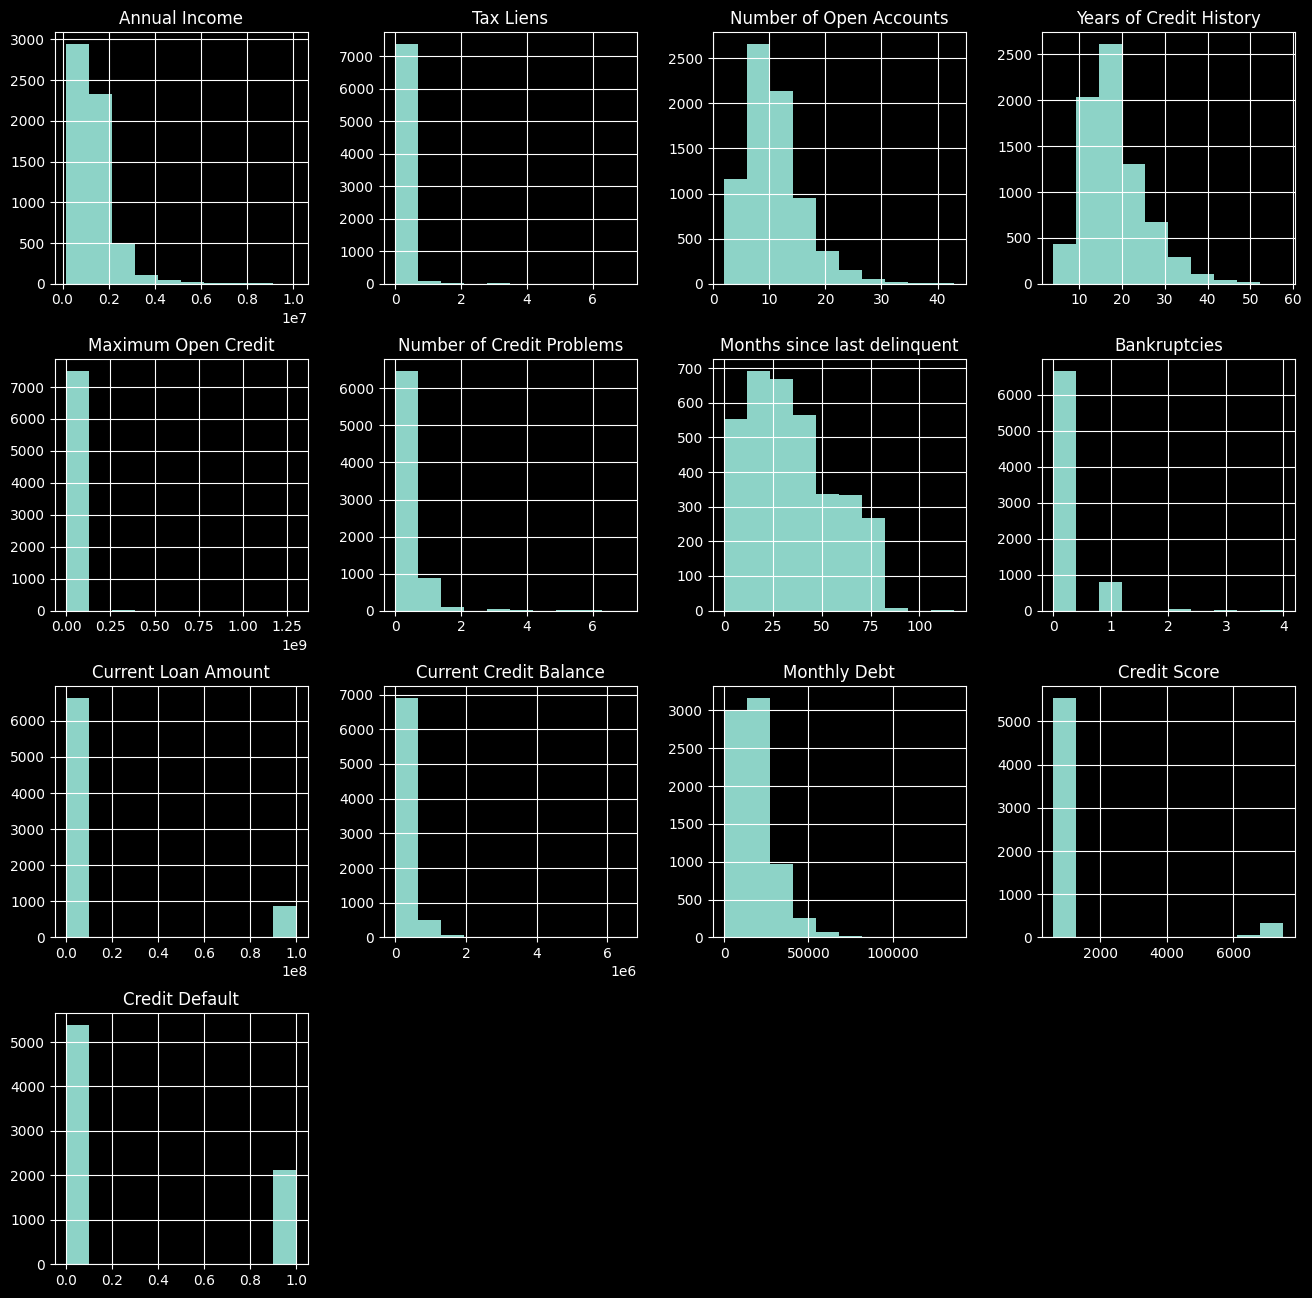

In [1881]:
df_train[numeric_features.columns].hist(figsize=(16, 16))
plt.show()

### Balancing classes

In [1882]:
target_name = 'Credit Default'

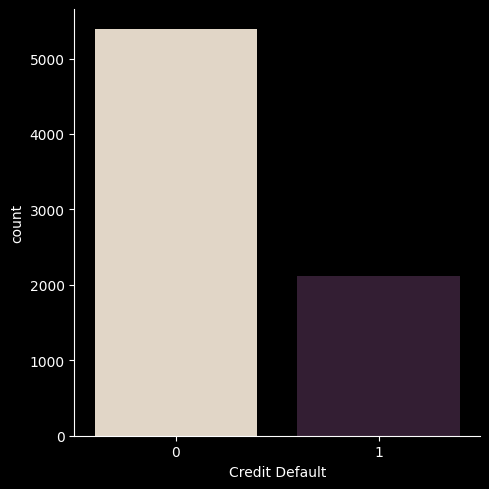

In [1883]:
sns.catplot(data=df_train, x=target_name, kind='count', palette='ch:.25')
plt.show()

We observe an imbalance of classes. Let's create a balancing function.

In [1884]:
class DataPreprocessor:

    @staticmethod
    def change_on_median(X, feature):
        X.loc[X[feature].isna(), feature] = X[feature].median()

    @staticmethod
    def change_on_frequent(X, feature):
        X.loc[X[feature].isna(), feature] = X[feature].value_counts().index[0]

    @staticmethod
    def balancing_target(X, target_name):
        target_counts = X[target_name].value_counts()

        big_cls = target_counts.argmax()
        min_cls = target_counts.argmin()

        # imbalance coef
        ratio = (target_counts[big_cls] / target_counts[min_cls])

        # integer value => ratio of big_class / small_class
        iters = int(ratio)

        for i in range(iters):
            # balancing classes
            sample = X[X[target_name] == min_cls].sample(int(target_counts[min_cls] * ((ratio % 1) if (i == iters - 1) else 1)))
            X = pd.concat([X, sample], axis=0, ignore_index=True)

        return X.sample(frac=1)


    def transform(self, X, y_name=None):
        # isnan
        for feature_name in ['Annual Income', 'Months since last delinquent', 'Credit Score']:
            self.change_on_median(X, feature_name)

        for feature_name in ['Years in current job', 'Bankruptcies']:
            self.change_on_frequent(X, feature_name)

        # categorical type strings => numbers
        cat_cols = X.select_dtypes(include=['category']).columns
        print("columns category: ", cat_cols)
        from sklearn.preprocessing import LabelEncoder

        encoder = LabelEncoder()

        for col_name in cat_cols:
            X[col_name] = encoder.fit_transform(X[col_name])

        # value of unique
        print("Counter of uniques values in categories:")
        print(X[cat_cols].nunique())

        # binary encoder
        import category_encoders as ce
        encoder = ce.BinaryEncoder(cols=['Years in current job', 'Purpose'])

        X = encoder.fit_transform(X)

        if y_name is not None:
            X = self.balancing_target(X, y_name)
            sns.catplot(data=X, x=y_name, kind='count', palette='ch:.25')
            plt.title('Balancing classes finish')
            plt.show()

        return X

columns category:  Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')
Counter of uniques values in categories:
Home Ownership           4
Years in current job    11
Purpose                 15
Term                     2
dtype: int64


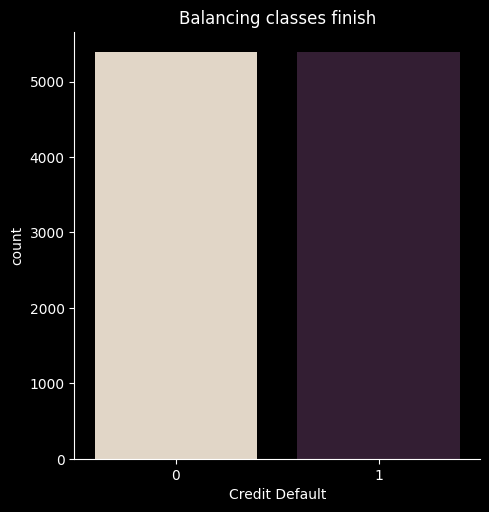

columns category:  Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')
Counter of uniques values in categories:
Home Ownership           4
Years in current job    11
Purpose                 14
Term                     2
dtype: int64
Nan value:  0


In [1885]:
preprocessor = DataPreprocessor()
df_train = preprocessor.transform(df_train, 'Credit Default')
df_test = preprocessor.transform(df_test)

print('Nan value: ', df_train.isna().sum().sum())

### Splitting data

In [1886]:
from sklearn.model_selection import train_test_split

In [1887]:
target = df_train['Credit Default']
data = df_train.drop(['Credit Default'], axis=1)

In [1888]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [1889]:
X_train.shape

(8618, 22)

### Normalization

In [1890]:
from sklearn.preprocessing import MinMaxScaler

In [1891]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test = scaler.transform(df_test)

### Model

In [1892]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [1893]:
# %%time
# tree = DecisionTreeClassifier(random_state=1)
#
# param_grid=[{
#              'max_depth': range(1, 10),
#              'min_samples_leaf': range(1, 10),
#             }]
#
# grid_search = GridSearchCV(tree, param_grid, cv=10)
# grid_search.fit(X_train, y_train)
# tree = grid_search.best_estimator_

In [1894]:
# grid_search.best_params_

In [1895]:
# tree_production = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1, random_state=1)
# tree_production.fit(X_train, y_train)
# y_pred_train = tree_production.predict(X_train)

In [1896]:
import xgboost as xgb

xgboost  = xgb.XGBClassifier(random_state=1, objective='binary:logistic', n_estimators=1700)
xgboost.fit(X_train, y_train)
y_pred_train = xgboost.predict(X_train)
y_pred_test = xgboost.predict(X_test)

In [1897]:
# import catboost as catb
#
# model_catb = catb.CatBoostClassifier()
# model_catb.fit(X_train, y_train, verbose=True, plot=True)
#
# y_pred_train = model_catb.predict(X_train)
# y_pred_test = model_catb.predict(X_test)

In [1898]:
# import lightgbm as lgbm
#
# model_lgbm = lgbm.LGBMClassifier(random_state=21)
# model_lgbm.fit(X_train, y_train)
#
# y_pred_train = model_lgbm.predict(X_train)
# y_pred_test = model_lgbm.predict(X_test)

In [1899]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4294
           1       1.00      1.00      1.00      4324

    accuracy                           1.00      8618
   macro avg       1.00      1.00      1.00      8618
weighted avg       1.00      1.00      1.00      8618



In [1900]:
print((classification_report(y_test, y_pred_test)))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1093
           1       0.85      0.94      0.89      1062

    accuracy                           0.89      2155
   macro avg       0.89      0.89      0.89      2155
weighted avg       0.89      0.89      0.89      2155



<Figure size 640x480 with 0 Axes>

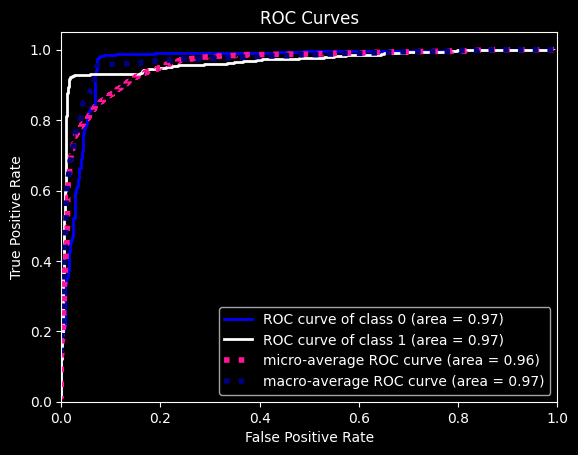

In [1901]:
from scikitplot.metrics import plot_roc
y_probs = xgboost.predict_proba(X_test)
plt.figure()
plot_roc(y_test, y_probs, cmap ="bwr")
plt.show()

### df_test

In [1902]:
df_test

array([[1.        , 0.10052941, 0.        , ..., 0.01627621, 0.04984672,
        0.02108303],
       [1.        , 0.00561418, 0.        , ..., 0.00707522, 0.01695945,
        0.01646209],
       [0.33333333, 0.09792902, 0.        , ..., 0.02251338, 0.1370291 ,
        0.96389892],
       ...,
       [0.33333333, 0.09986074, 1.        , ..., 0.10395868, 0.27006343,
        0.01588448],
       [1.        , 0.05491303, 0.        , ..., 0.06012912, 0.09881547,
        0.02296029],
       [1.        , 0.15226291, 0.        , ..., 0.08599177, 0.17149672,
        0.90036101]])

In [1903]:
y_predict_test = xgboost.predict(df_test)
y_predict_test

array([0, 1, 1, ..., 1, 0, 1])